In [2]:
from pymystem3 import Mystem
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.tokenize import word_tokenize 

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
# PREPROCESSING
# unfortunately, i couldn't find a way to get rid of punctuation...

m = Mystem()
sw = stopwords.words('russian')

with open('hobbit.txt', 'r', encoding='utf8') as f:
    text = f.readlines()

new_lines = []

for line in tqdm(text):
    line = ' '.join([w for w in line.split() if w not in sw])
    newline = ''.join(m.lemmatize(line))
    new_lines.append(newline)
        
with open('hobbit_lem.txt', 'w', encoding='utf8') as f1:
    for line in new_lines:
        f1.write(line)

100%|██████████████████████████████████████████████████████████████████████████████| 3938/3938 [50:17<00:00,  1.30it/s]


In [41]:
f = 'hobbit_lem.txt'
data = gensim.models.word2vec.LineSentence(f)

In [47]:
### WORD2VEC MODEL

# min_count: i wanted to include as many words as there could be in the text that's why i chose the minimum threshold
# window: i chose 3 because the data was too large
# size: i decided to go with 300 to store more vectors in the model and create a bigger dictionary

%time model_hobbit = gensim.models.Word2Vec(data, size=300, window=3, min_count=1)

2020-10-07 18:49:12,396 : INFO : collecting all words and their counts
2020-10-07 18:49:12,398 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-07 18:49:12,493 : INFO : collected 12382 word types from a corpus of 49792 raw words and 2085 sentences
2020-10-07 18:49:12,497 : INFO : Loading a fresh vocabulary
2020-10-07 18:49:12,548 : INFO : effective_min_count=1 retains 12382 unique words (100% of original 12382, drops 0)
2020-10-07 18:49:12,550 : INFO : effective_min_count=1 leaves 49792 word corpus (100% of original 49792, drops 0)
2020-10-07 18:49:12,642 : INFO : deleting the raw counts dictionary of 12382 items
2020-10-07 18:49:12,643 : INFO : sample=0.001 downsamples 15 most-common words
2020-10-07 18:49:12,644 : INFO : downsampling leaves estimated 46173 word corpus (92.7% of prior 49792)
2020-10-07 18:49:12,688 : INFO : estimated required memory for 12382 words and 300 dimensions: 35907800 bytes
2020-10-07 18:49:12,690 : INFO : resetting layer wei

Wall time: 5.62 s


In [48]:
print(len(model_hobbit.wv.vocab))

12382


In [49]:
print(sorted([w for w in model_hobbit.wv.vocab]))

['(«верно,', '(«наверняка', '(«ну', '(а', '(бедный,', '(бильбо', '(бладортин', '(бросать', '(в', '(ведь', '(вообще-то', '(ворона-посланец', '(впрочем,', '(вы', '(вы,', '(гном', '(даже', '(двое', '(добрый', '(должно', '(если', '(если,', '(еще', '(жена', '(зато', '(золото', '(и', '(или', '(иначе', '(казаться,', '(как', '(какой', '(конечно,', '(любезный', '(между', '(мочь', '(мы', '(на', '(наверное,', '(надо', '(накрывать', '(небольшой', '(некоторый', '(непонятно', '(но', '(ну', '(ныне', '(он', '(они', '(откуда', '(пес', '(по', '(пожалуй,', '(помнить,', '(понимать,', '(потеря', '(правда,', '(признавать,', '(пускай', '(разве', '(разумеется,', '(сквозь', '(слишком', '(спасаться', '(среди', '(так', '(такой', '(там', '(теперь', '(то', '(то,', '(толстяк', '(тон', '(тот', '(тут', '(хоббит', '(хотя', '(часть', '(чего-что,', '(что', '(это', '*', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9', '«Хо!', '«а', '«бе-е-е»,', '«без', '«винцо»', '«

In [59]:
# this part works... okay, more or less. some outputs are predictable, like this one:
model_hobbit.wv.most_similar(positive=["бильбо"], topn=5)

[('—', 0.9994441270828247),
 ('гном', 0.9992638230323792),
 ('который', 0.9992119669914246),
 ('хоббит', 0.9991803169250488),
 ('свой', 0.9991794228553772)]

In [53]:
# others... not so much, as it seems:
model_hobbit.wv.most_similar(positive=["гном", "бочка"], topn=5)
# i was hoping to see something like "река", "плыть" or something like that. 
# i also don't understand why didn't it get rid of words like "который"

[('—', 0.9853713512420654),
 ('который', 0.9853434562683105),
 ('хоббит', 0.9853400588035583),
 ('а', 0.9852973222732544),
 ('становиться', 0.9851822853088379)]

In [60]:
# the next one works ok just as well
model_hobbit.wv.similarity("бильбо", "кольцо")

0.99383485

In [61]:
# this one worked a lot worse when i window was equal to >4, it was around 0.9
model_hobbit.wv.similarity("эльф", "шея")

0.47737542

In [62]:
model_hobbit.wv.doesnt_match("человек гном эльф щит".split())
# and this one works super well! good job, model_hobbit!

'щит'

In [70]:
model_hobbit.wv.doesnt_match("торин балин глоин чародей".split())

'чародей'

In [29]:
### VISUALIZATION

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

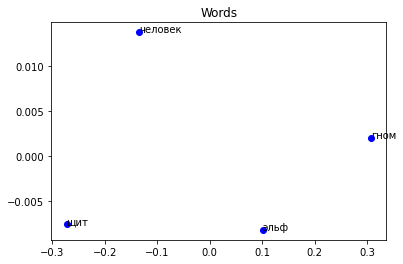

In [63]:
words = ["человек","эльф","гном","щит"]
X = model_hobbit[words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], color='blue')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

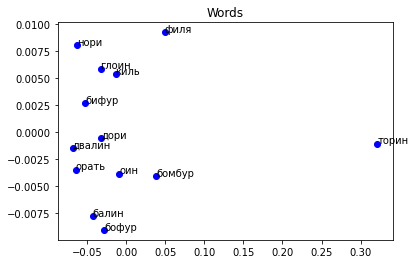

In [88]:
# huh... well at least the model agrees that elves and dwarves don't have a lot in comparison...
#let's try to put dwarves' names in the model
words = ["торин","балин","глоин","бифур","бомбур","бофур","оин","двалин","дори","нори","киль","филя","орать"]
X = model_hobbit[words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], color='blue')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

In [155]:
# okay, so
# the lemmatizer messed with the names of two dwarves -- киля and ори, changing them into киль and орать... 
# but the model performed quite well this time, separating torin from the rest of the gang, for some reason
# let's try to add bilbo and gandalf to the graph

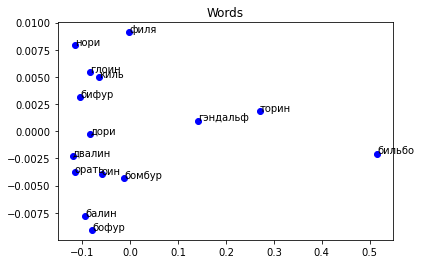

In [89]:
words = ["торин","балин","глоин","бифур","бомбур","бофур","оин","двалин","дори","нори","киль","филя","орать","бильбо","гэндальф"]
X = model_hobbit[words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], color='blue')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

In [ ]:
# this is actually a good result i think! at least it coincides with my impressions with the characters
# bilbo is often separated from his crew
# gandalf and torin are advisor and leader so it makes sense for them to be this close
# and others aren't given that much times to shine (except in the last battle i suppose), so they're all packed together

In [160]:
# to sum up, the model seems to be working okay? but not too well, most probably because of the punctuation, sadly